## Project Overview

This notebook builds a classifier to predict personality (Introvert/Extrovert) from behavioral traits.
I will load the dataset, preprocess it, perform exploratory analysis, train a machine learning model,
and save it for integration into a Streamlit application.

In [ ]:
# importing all the necessary libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

import joblib

In [60]:
import xgboost as xgb
from xgboost import XGBClassifier

## Data loading and viewing


In [35]:
# loading dataset into the dataframe in using pandas

dataset_path = 'D:\data_cleaning_using_python\personality_bot\dataset\intro_vs_extro_behave_dataset\personality_dataset.csv' 

df = pd.read_csv(dataset_path)
# displaying the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head(5))

First 5 rows of the dataset:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\2366759636.py:3: SyntaxWarning: invalid escape sequence '\d'
  dataset_path = 'D:\data_cleaning_using_python\personality_bot\dataset\intro_vs_extro_behave_dataset\personality_dataset.csv'


In [36]:
# checking all the dataset details
print("\nDataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
# display cloumns of the dataset and no of columns
print("\nDataset Columns:")
print(df.columns)
print("\nNumber of Columns in the dataset:")
print(len(df.columns))
print(len(df) , "rows in the dataset")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Dataset Description:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192       

In [37]:
# finding the null values in the dataset
print("\nChecking for null values:")
print(df.isnull().sum())



Checking for null values:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [38]:
#print null value contains rows
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])
print(len(df[df.isnull().any(axis=1)]), "rows with null values found.")



Rows with null values:
      Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
6                  4.0         No                      9.0            NaN   
33                 8.0        Yes                      3.0            3.0   
41                 1.0         No                      4.0            5.0   
59                 NaN         No                      9.0            4.0   
71                 1.0         No                      NaN            5.0   
...                ...        ...                      ...            ...   
2882               1.0        NaN                      9.0            3.0   
2885              10.0        Yes                      0.0            0.0   
2893               9.0        NaN                      2.0            0.0   
2894               0.0         No                      9.0            3.0   
2898              11.0        Yes                      1.0            NaN   

     Drained_after_socializing  Friends_circle_size

In [ ]:
# displaying the null values in each column
print(df.isnull().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


## Data preprocessing

In [42]:
#drop all the null valued rows in the dataset
df = df.dropna()

#print the columns with null valus
print("\nAfter dropping null values, the dataset now has:")
print(df.isnull().sum())



After dropping null values, the dataset now has:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [44]:
# find the unique values in the dataset4    
print("\nUnique values in each column:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
    print(unique_values)  # Display first 5 unique values for brevity
    print()  # New line for better readability


Unique values in each column:
Time_spent_Alone: 12 unique values
[ 4.  9.  0.  3.  1.  2. 10.  6.  5.  8.  7. 11.]

Stage_fear: 2 unique values
['No' 'Yes']

Social_event_attendance: 11 unique values
[ 4.  0.  1.  6.  9.  7.  8.  3.  5.  2. 10.]

Going_outside: 8 unique values
[6. 0. 2. 7. 4. 5. 3. 1.]

Drained_after_socializing: 2 unique values
['No' 'Yes']

Friends_circle_size: 16 unique values
[13.  0.  5. 14.  8.  6.  7. 15.  4. 10.  1. 12.  2. 11.  9.  3.]

Post_frequency: 11 unique values
[ 5.  3.  2.  8.  6.  0. 10.  7.  4.  1.  9.]

Personality: 2 unique values
['Extrovert' 'Introvert']



In [45]:
#encode the categorical columns
label_encoder = LabelEncoder()
yes_no_cols = ['Stage_fear','Drained_after_socializing']
for col in yes_no_cols:
    df[col] = label_encoder.fit_transform(df[col]) # Convert 'Yes'/'No' to 1/0

df.head(5)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert


In [46]:
personality_map = {
    "Introvert": 0,
    "Extrovert": 1
}
# Map personality types to numerical values
df['Personality'] = df['Personality'].map(personality_map)

df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


## Data Visualizing

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3614343081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personality', data=df, palette='viridis')


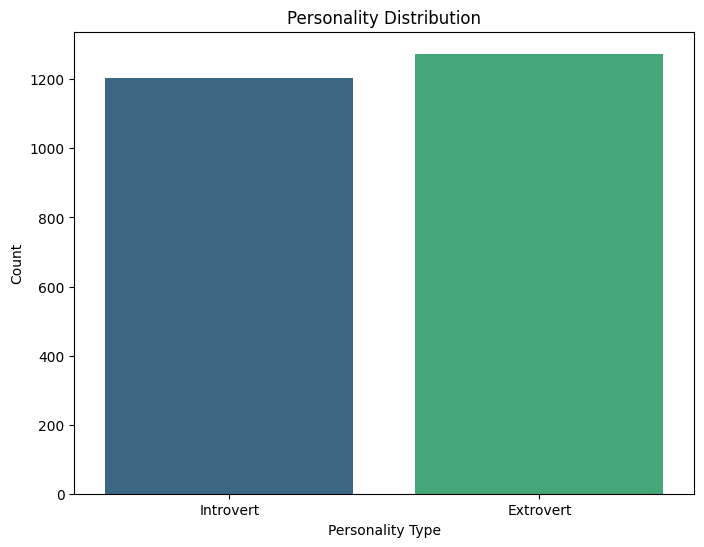

In [ ]:
# plot the personality distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Personality', data=df, palette='viridis')
plt.title('Personality Distribution')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
plt.show()

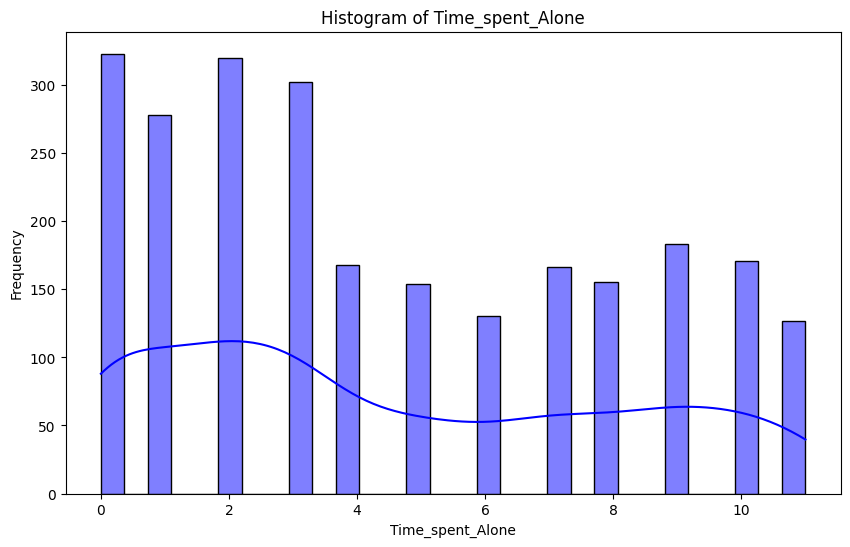

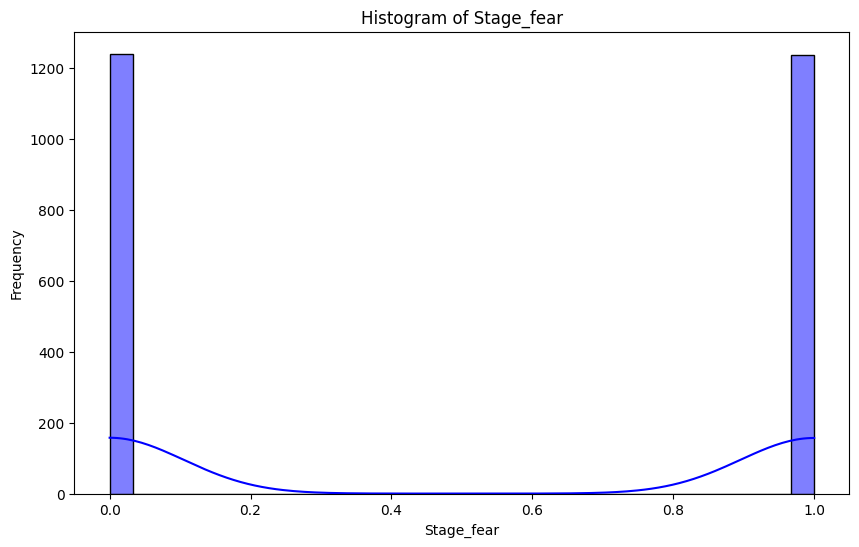

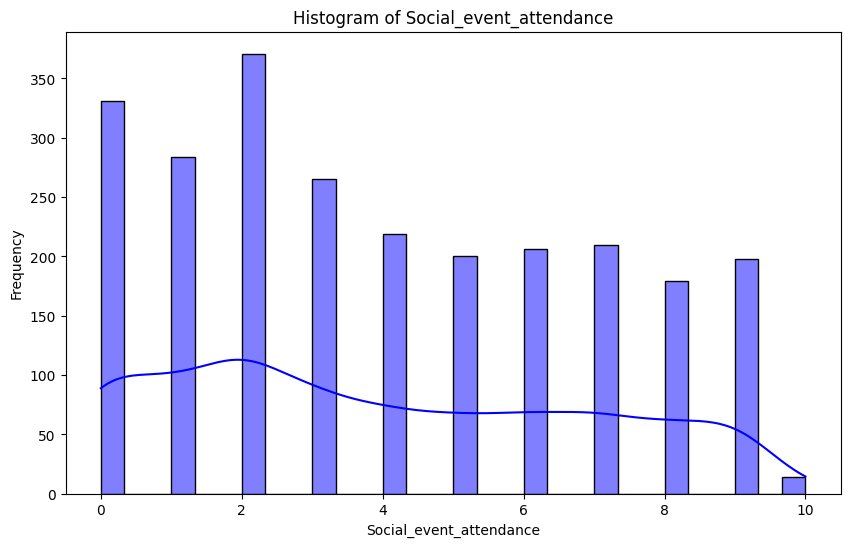

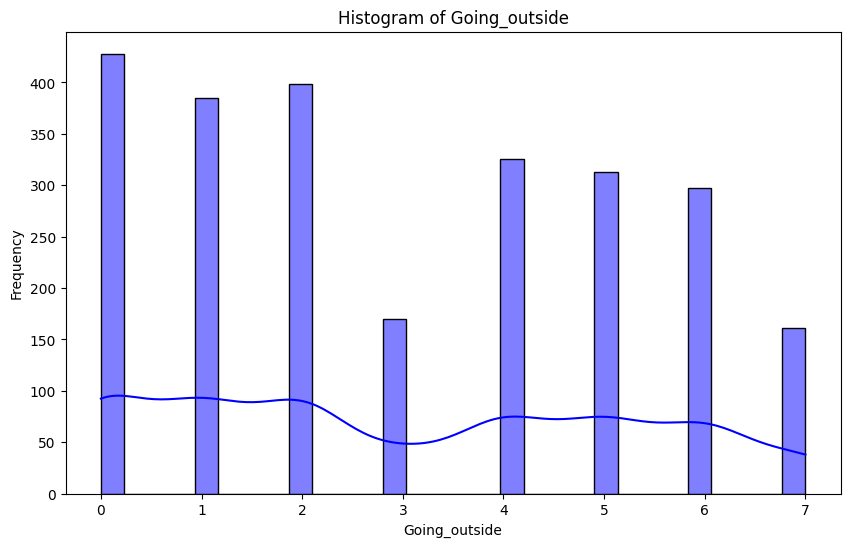

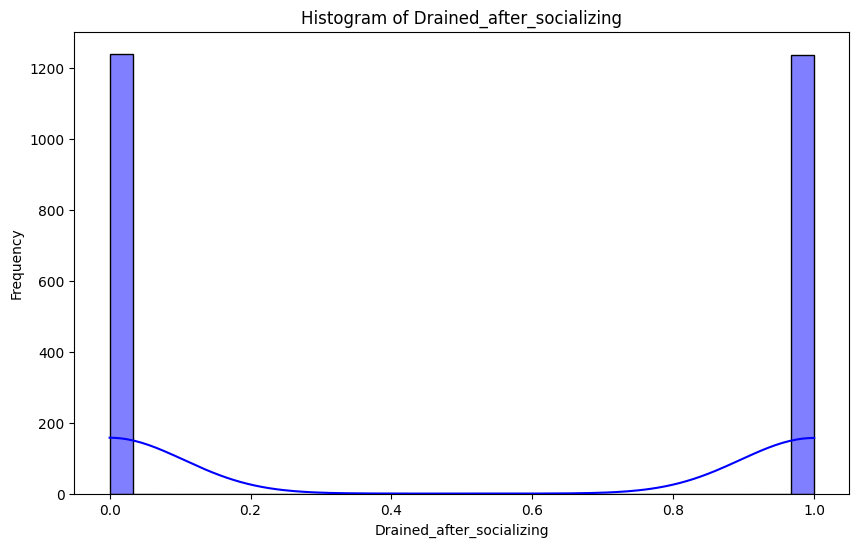

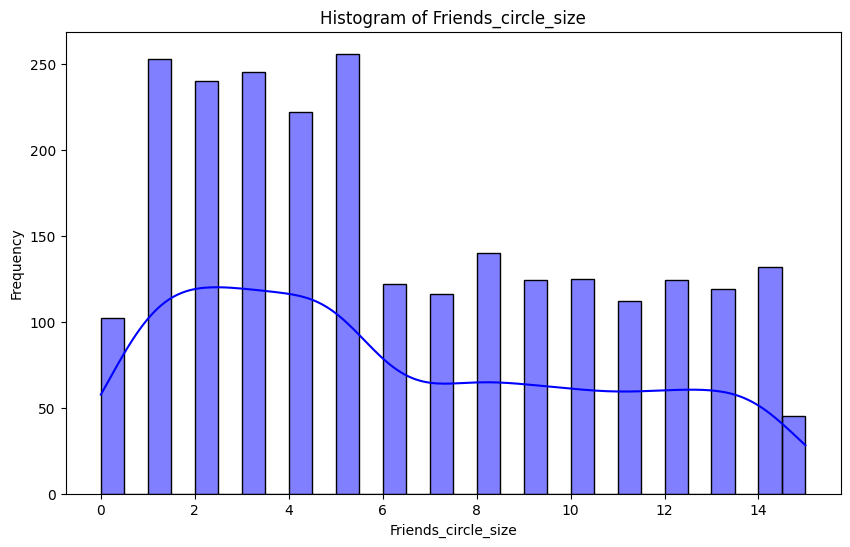

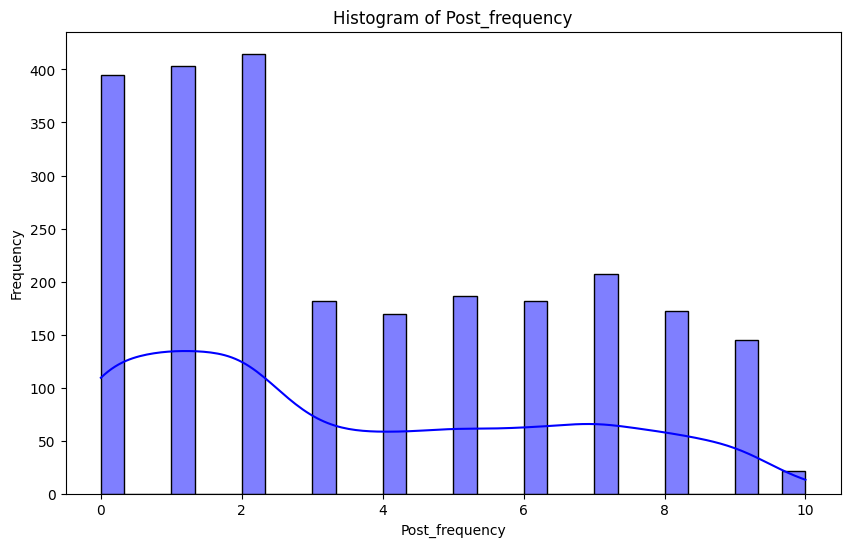

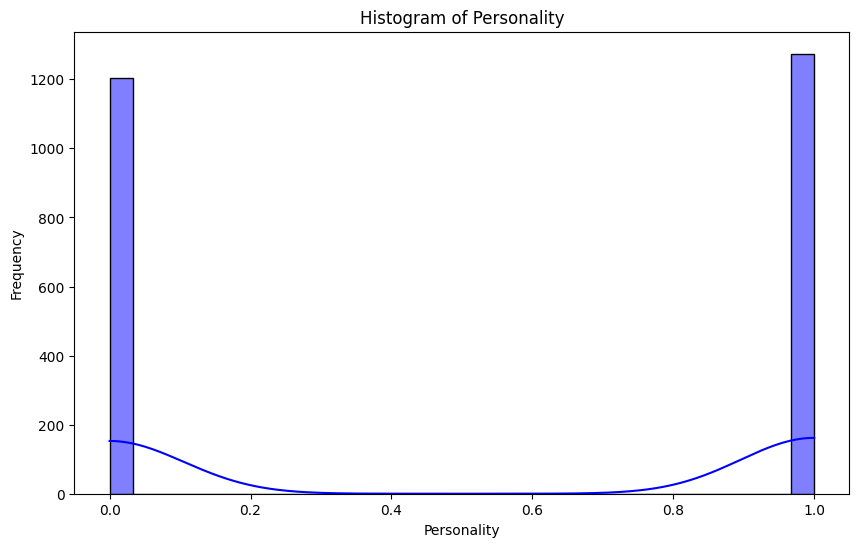

In [49]:
# histograms for continuous features
continuous_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


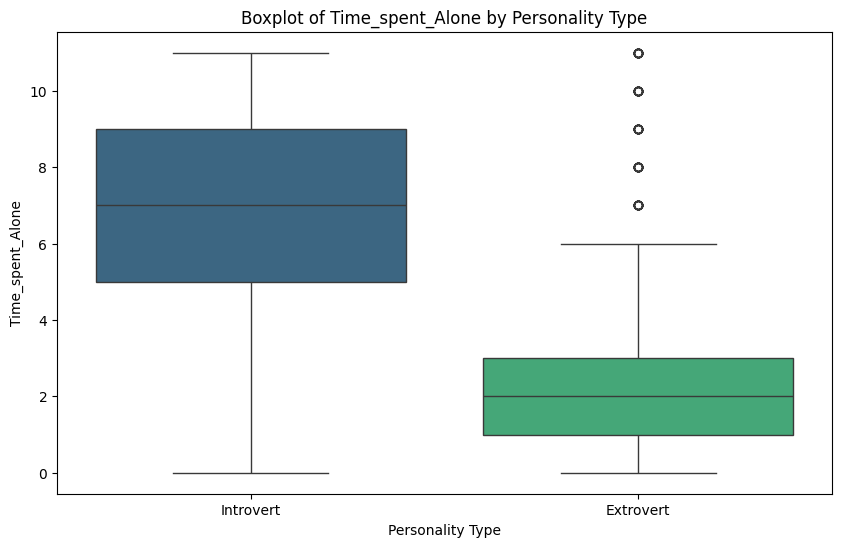

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


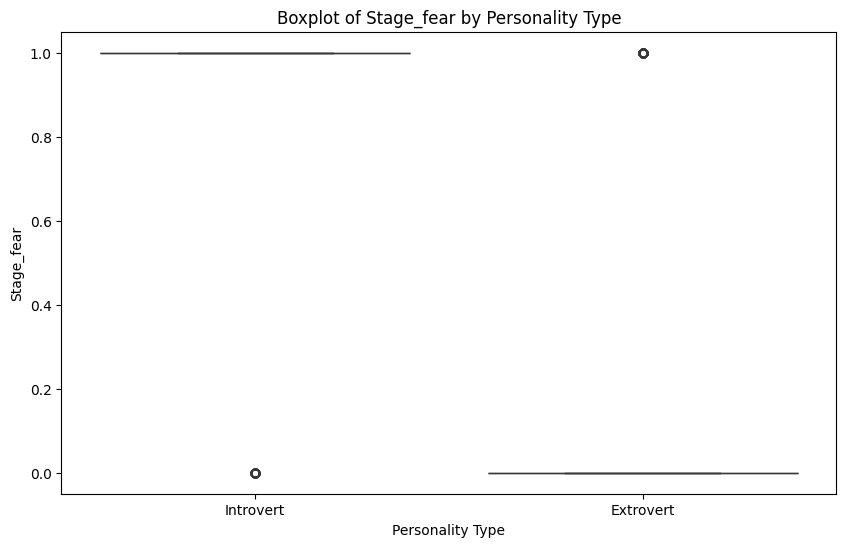

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


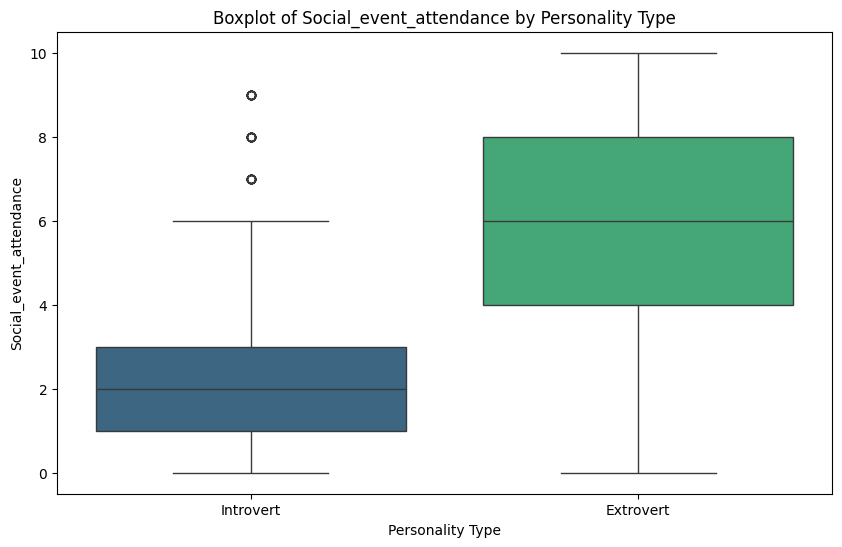

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


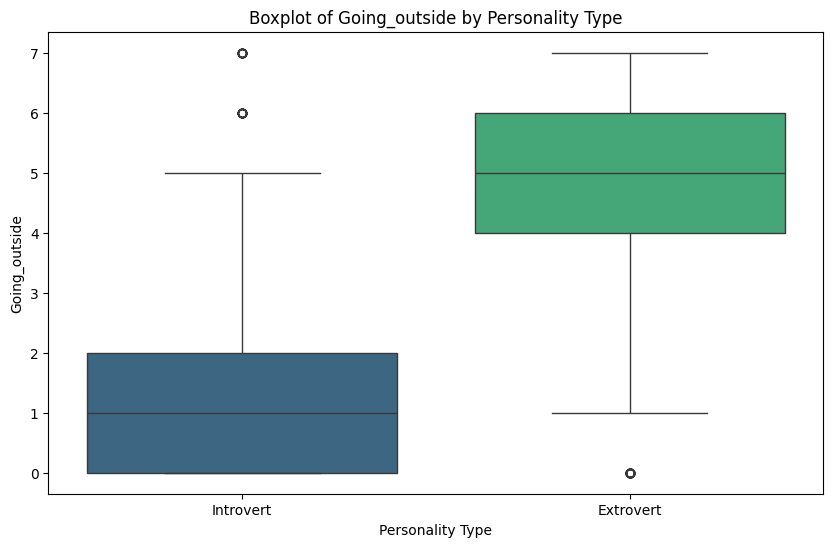

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


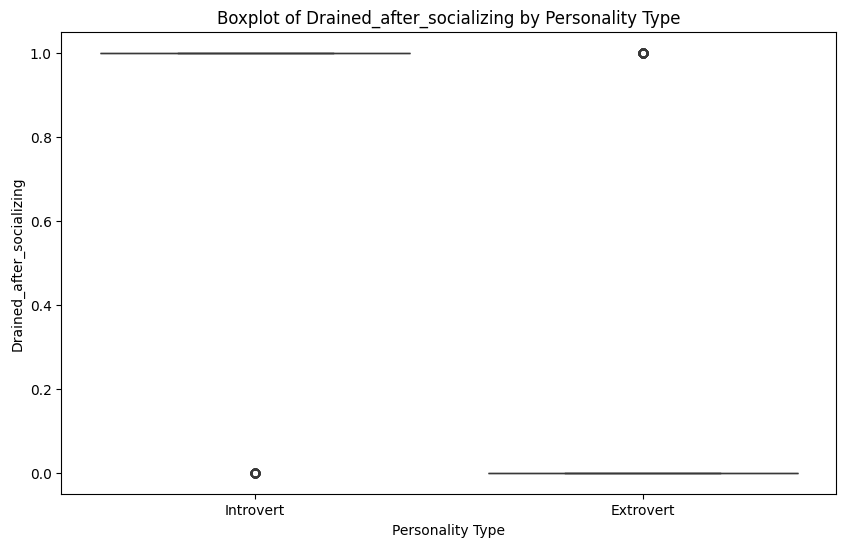

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


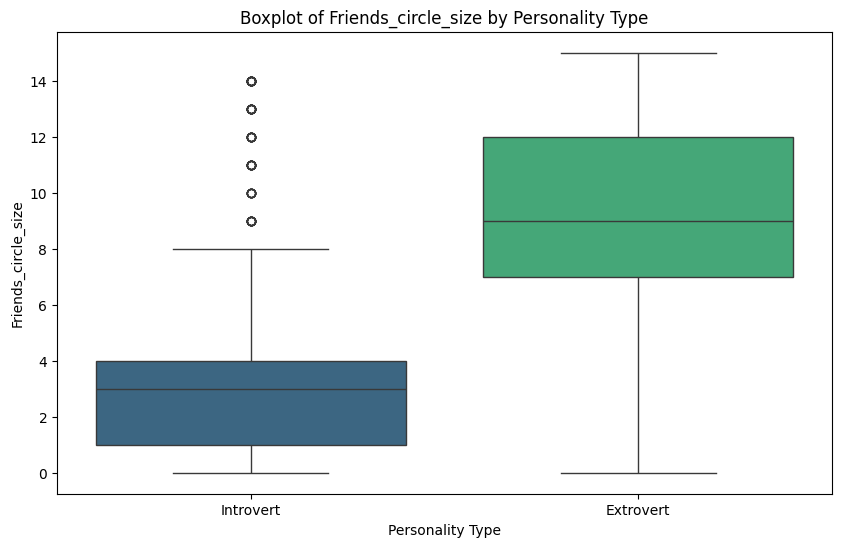

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


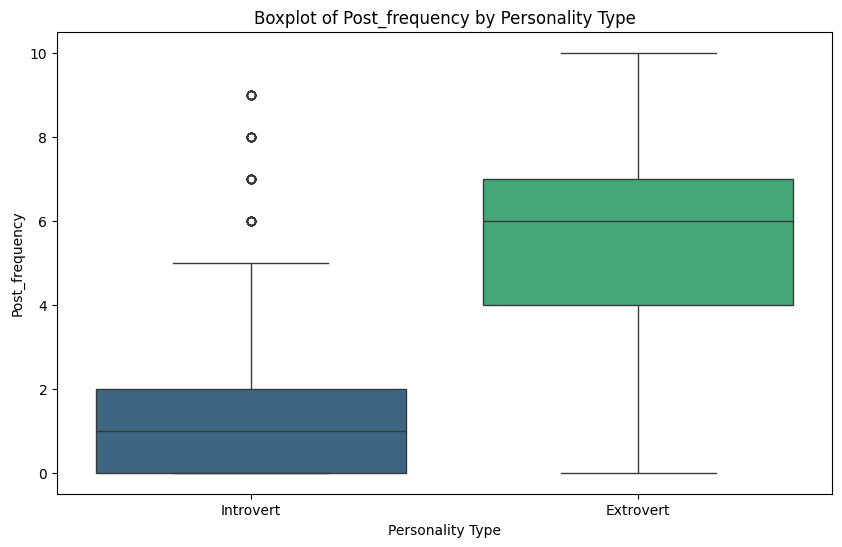

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1608061974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')


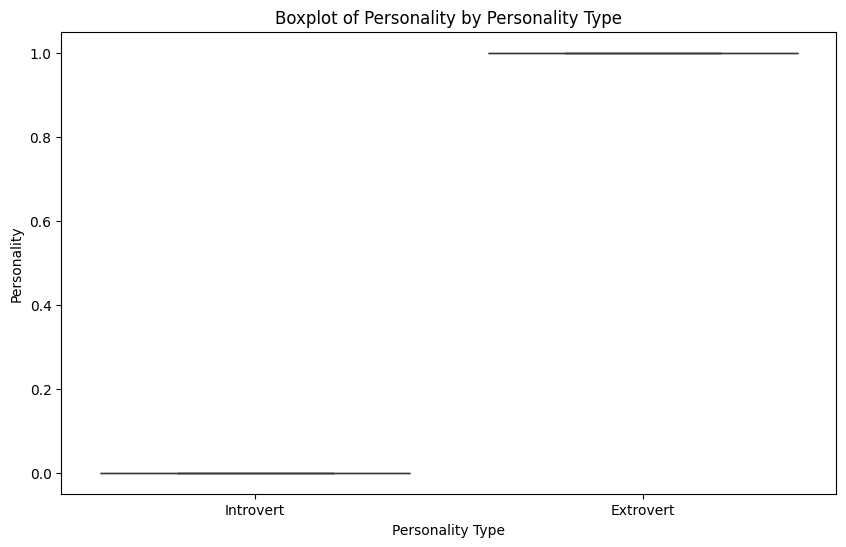

In [50]:
# boxplots for feature vs personality
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Personality', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot of {feature} by Personality Type')
    plt.xlabel('Personality Type')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
    plt.show()

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


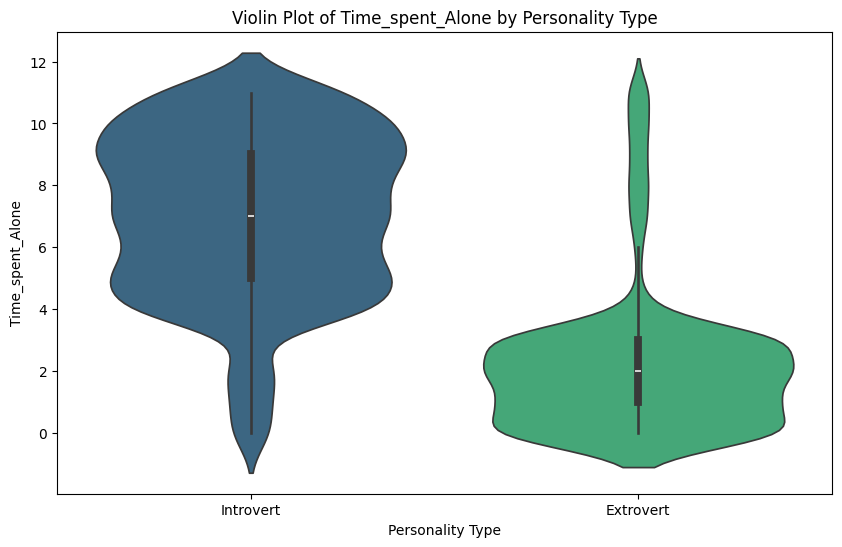

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


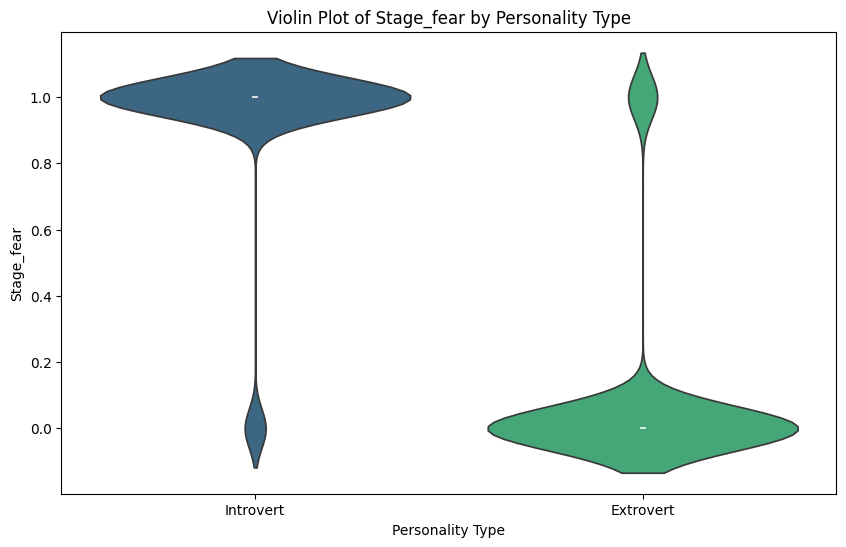

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


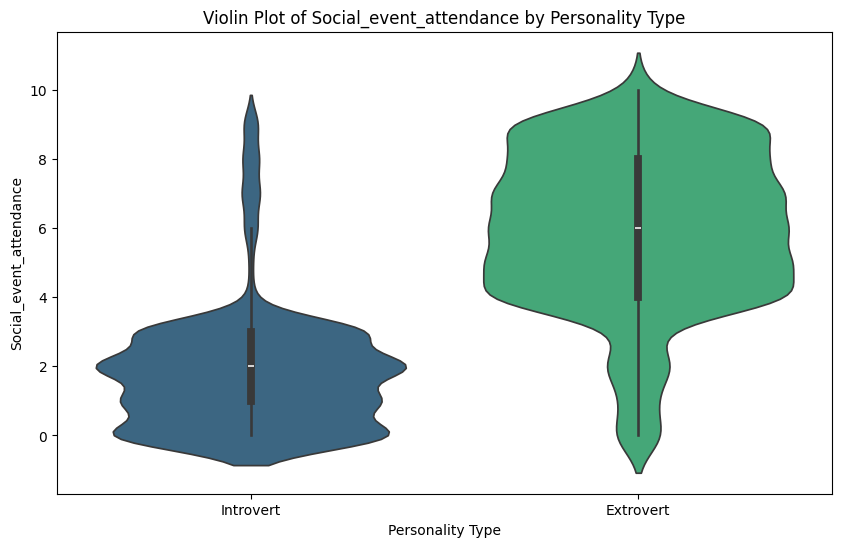

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


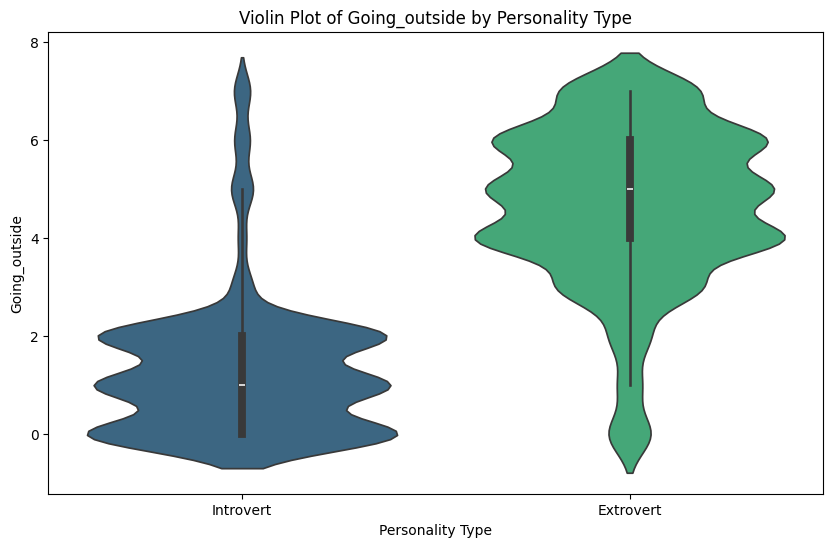

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


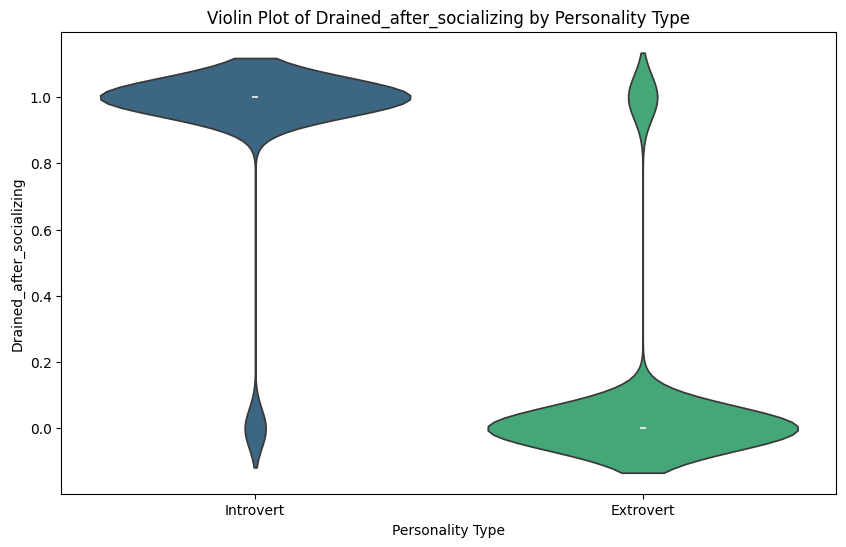

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


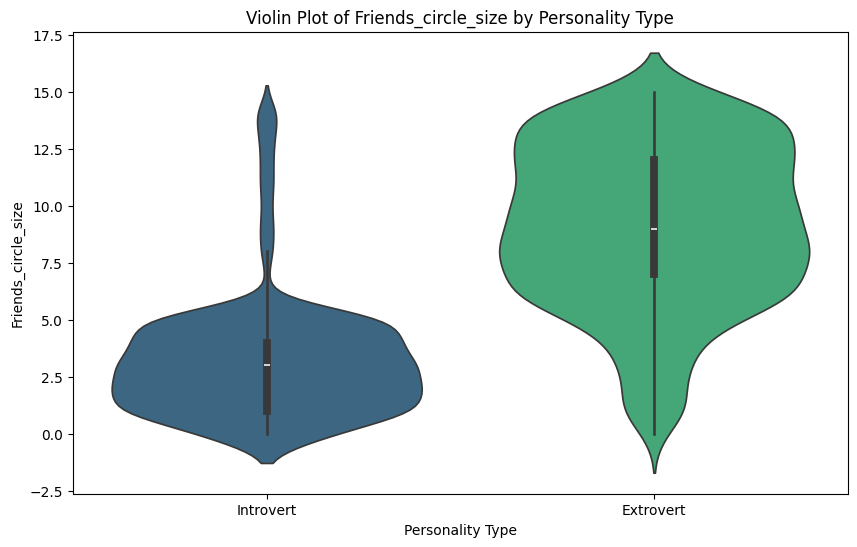

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


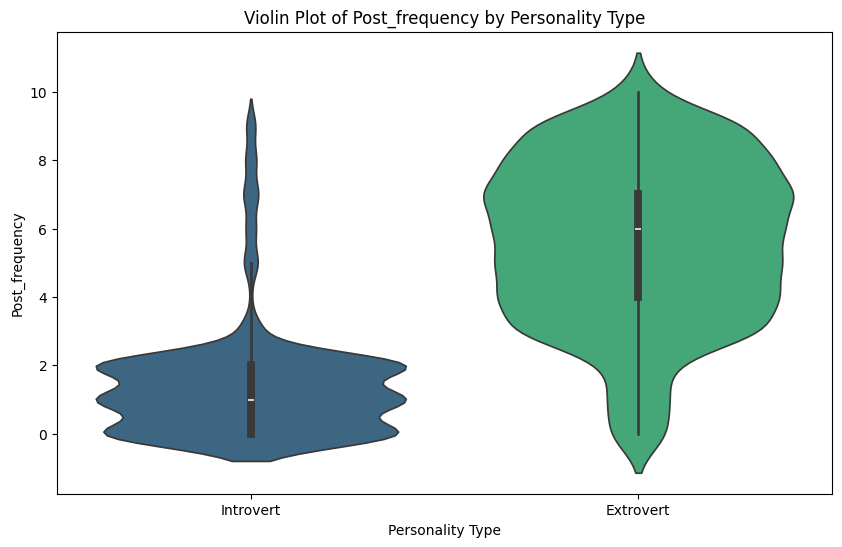

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\3579139048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')


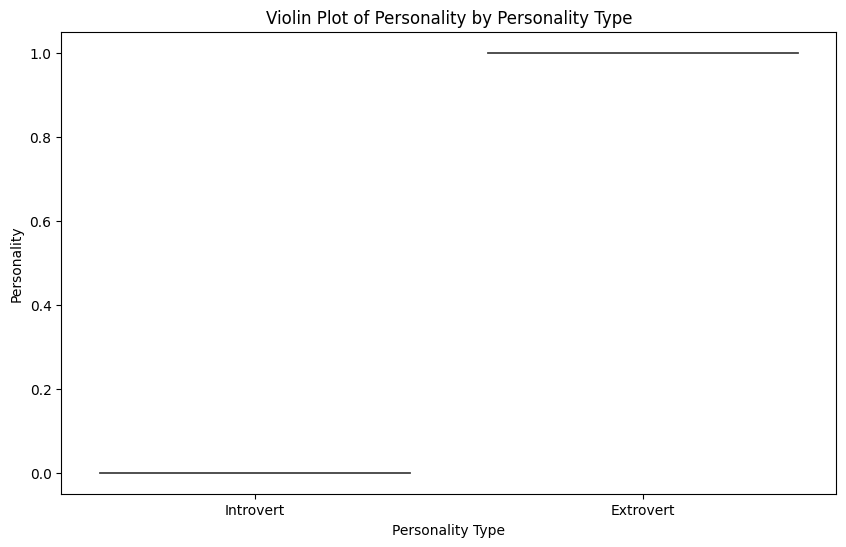

In [51]:
#violence plot for feature vs personality
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Personality', y=feature, data=df, palette='viridis')
    plt.title(f'Violin Plot of {feature} by Personality Type')
    plt.xlabel('Personality Type')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
    plt.show()

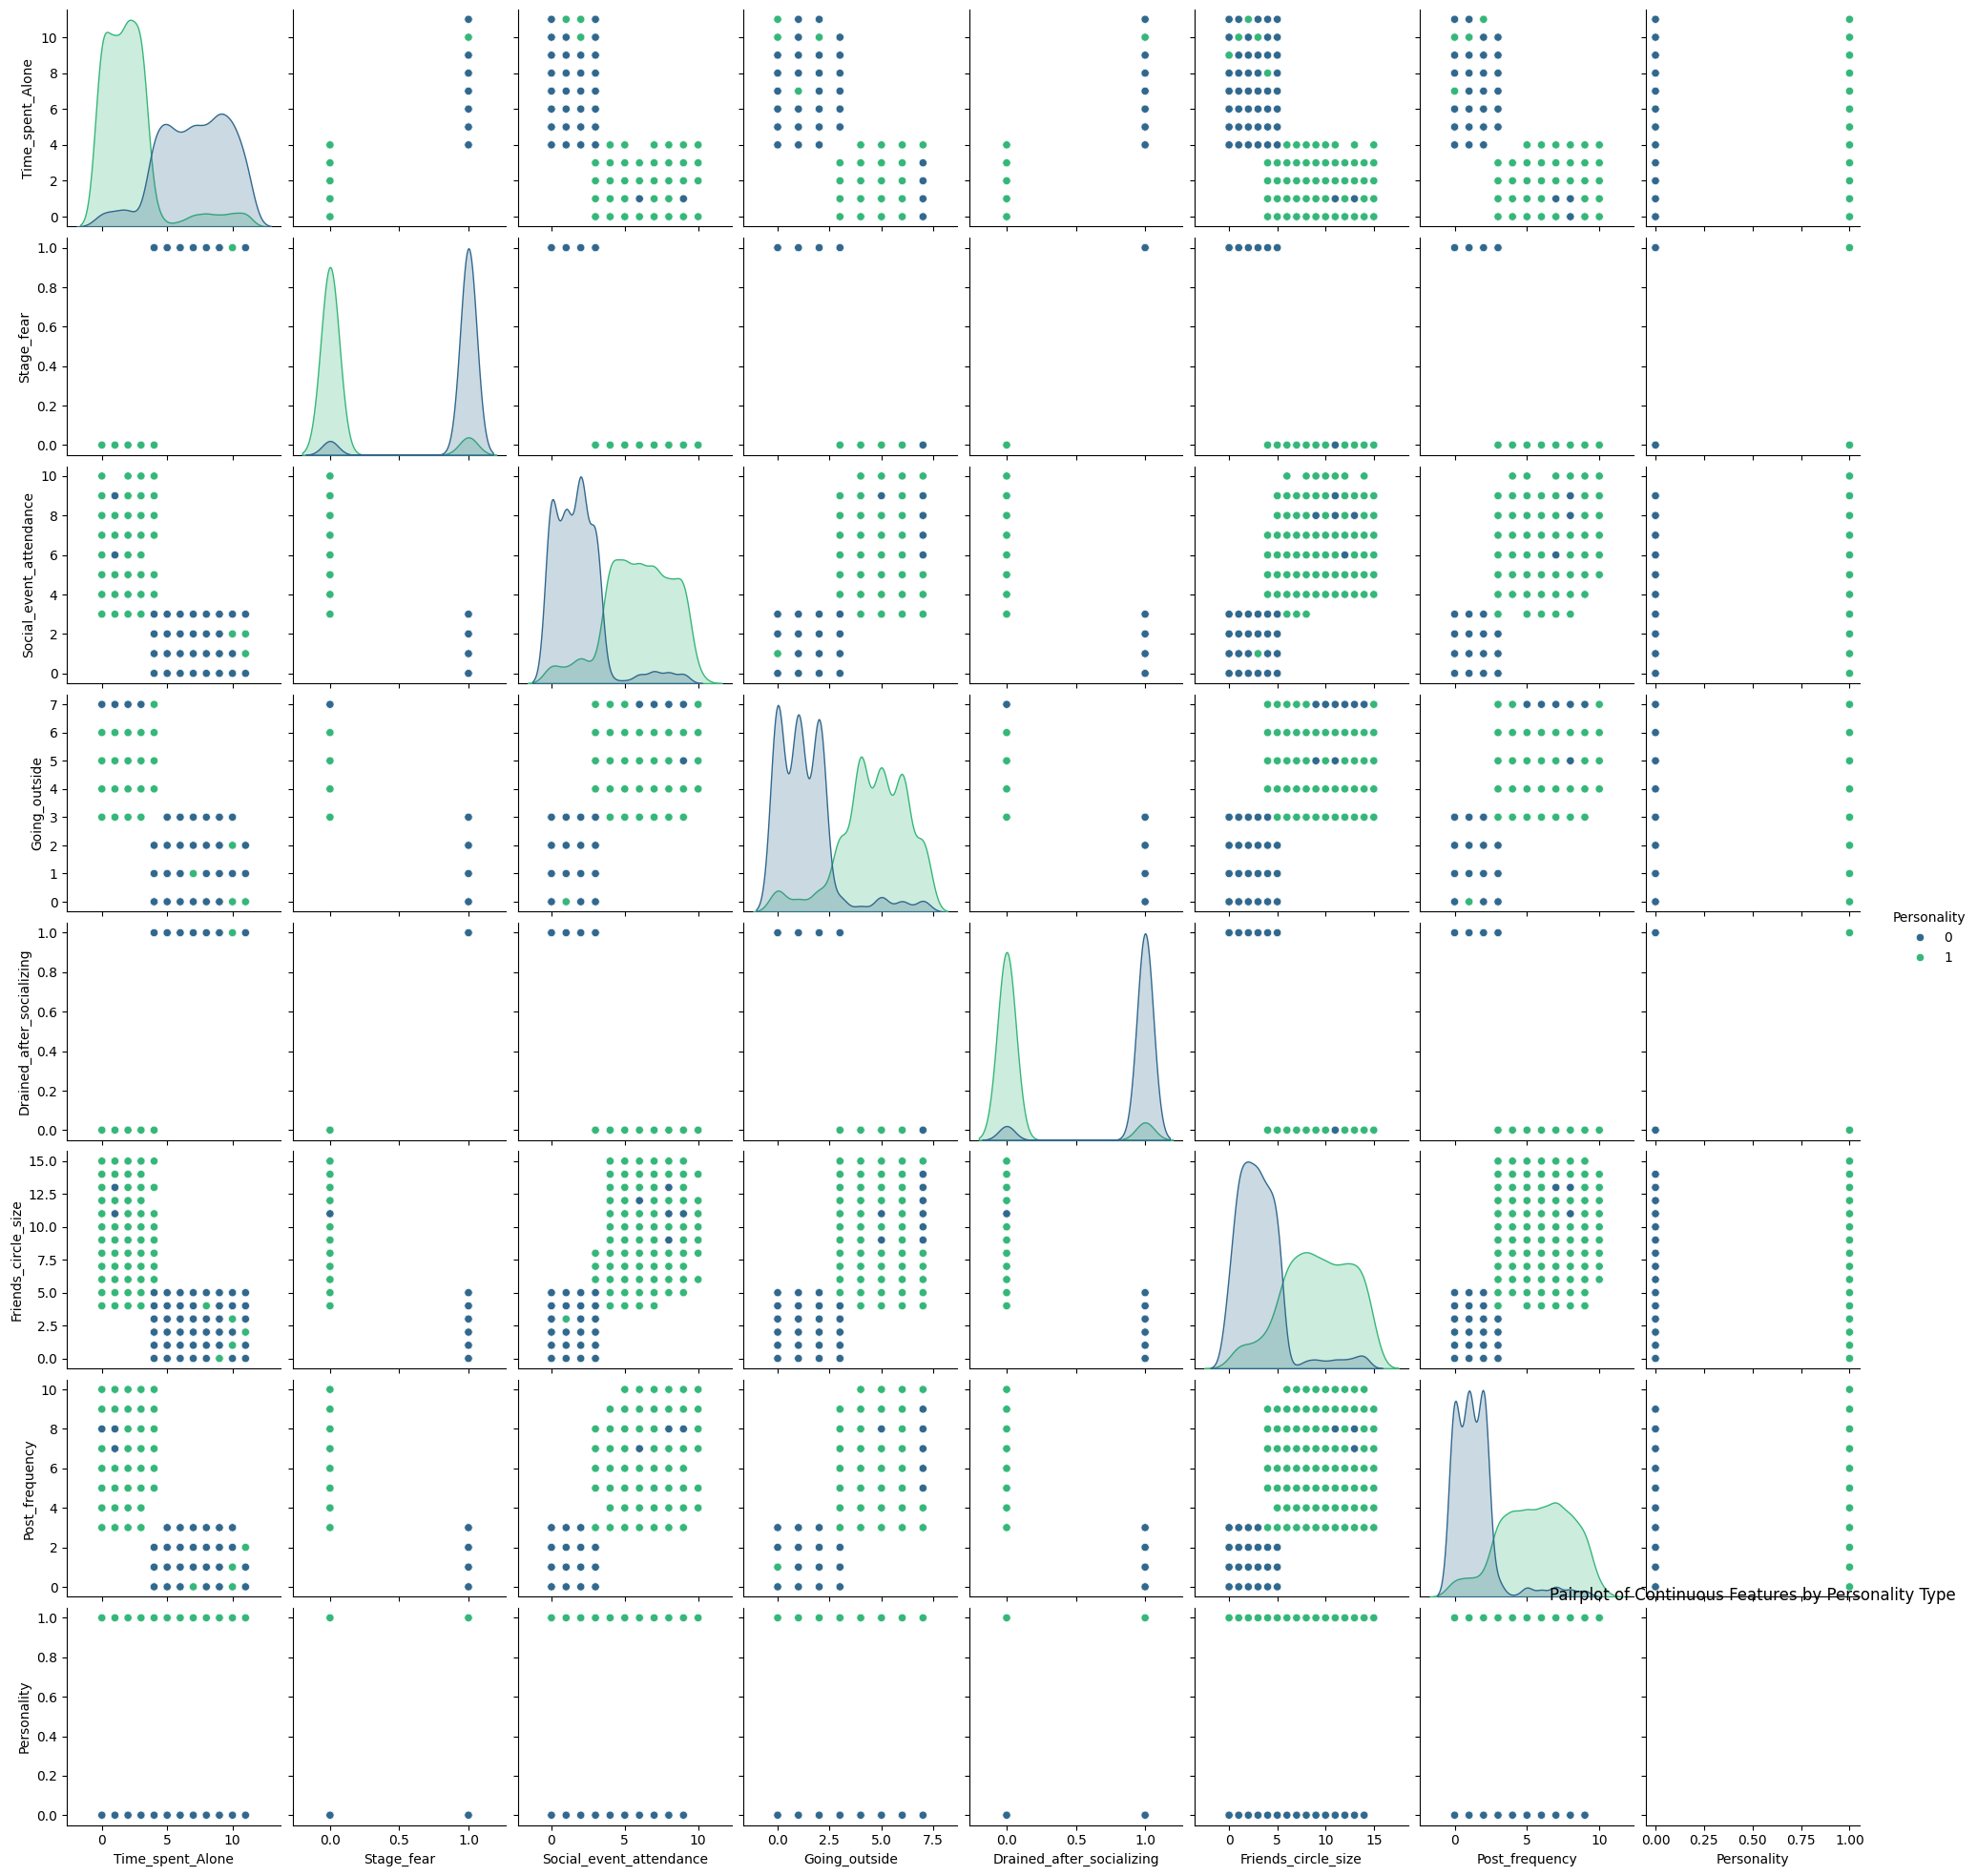

In [ ]:
# pairplot for continuous features separated by personality type and
sns.pairplot(df, hue='Personality', vars=continuous_features, palette='viridis')
plt.title('Pairplot of Continuous Features by Personality Type')
plt.show()


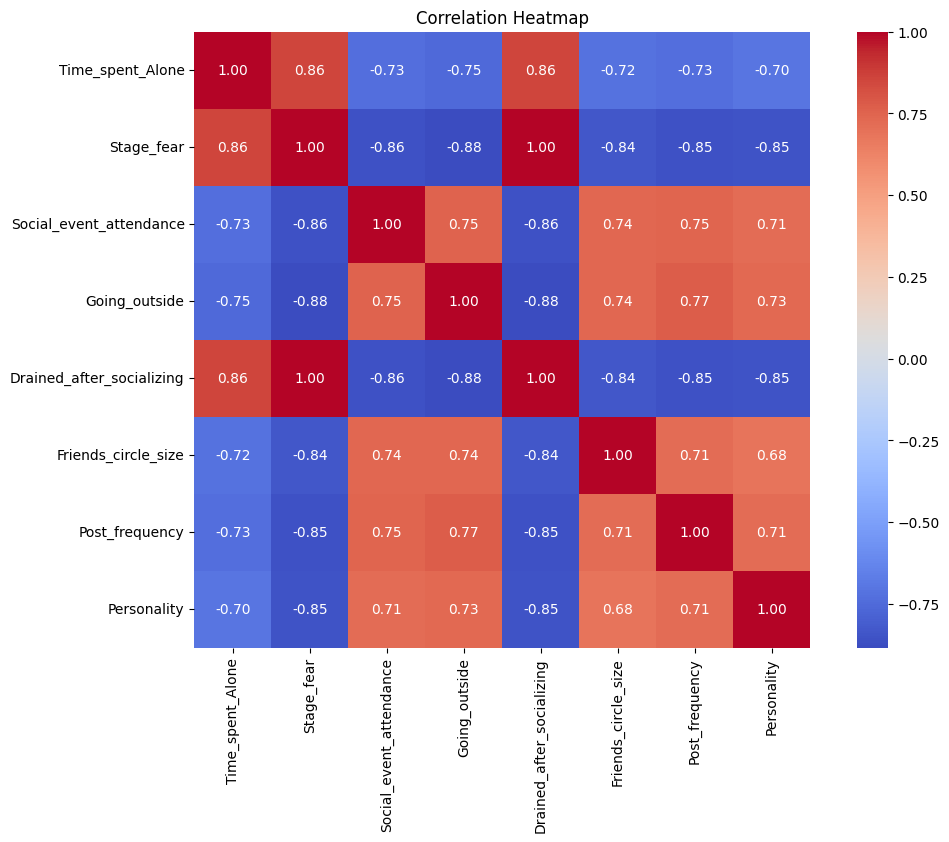

In [57]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


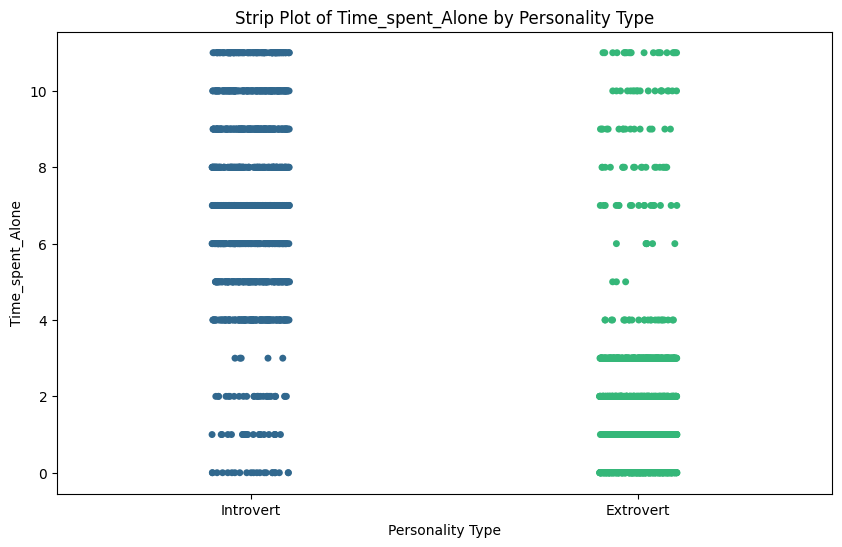

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


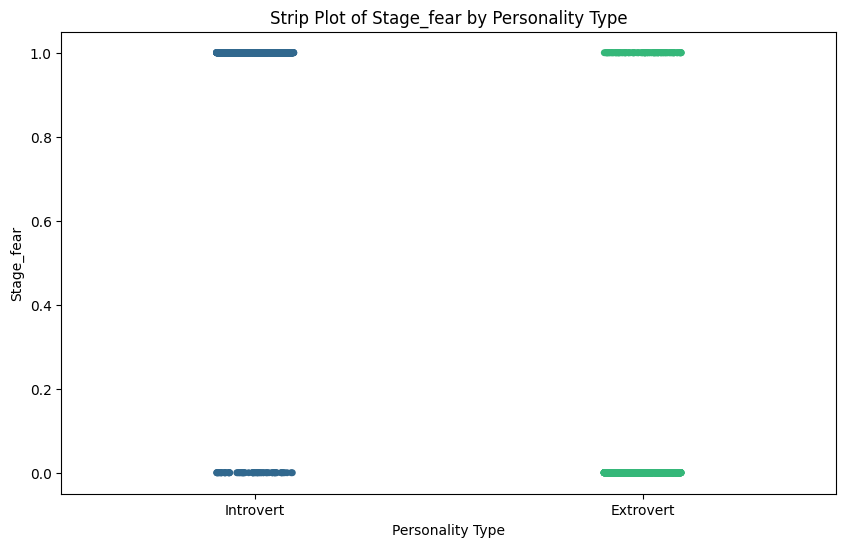

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


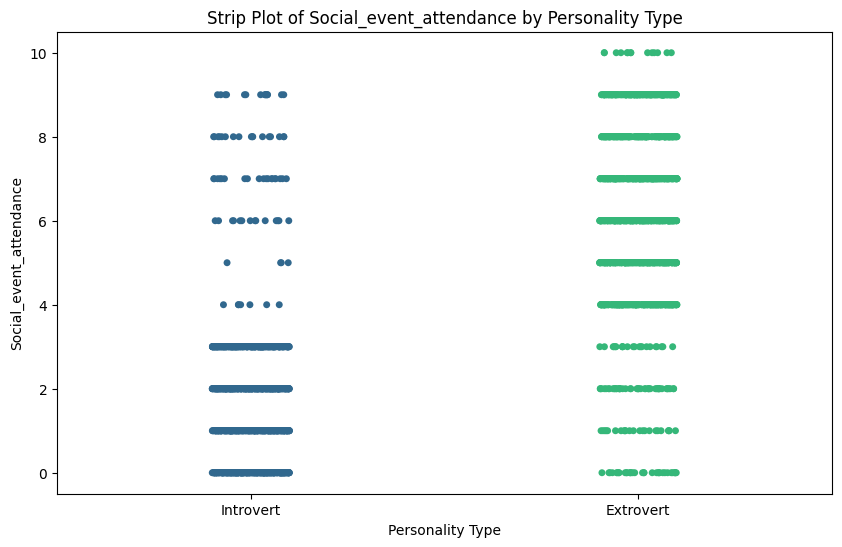

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


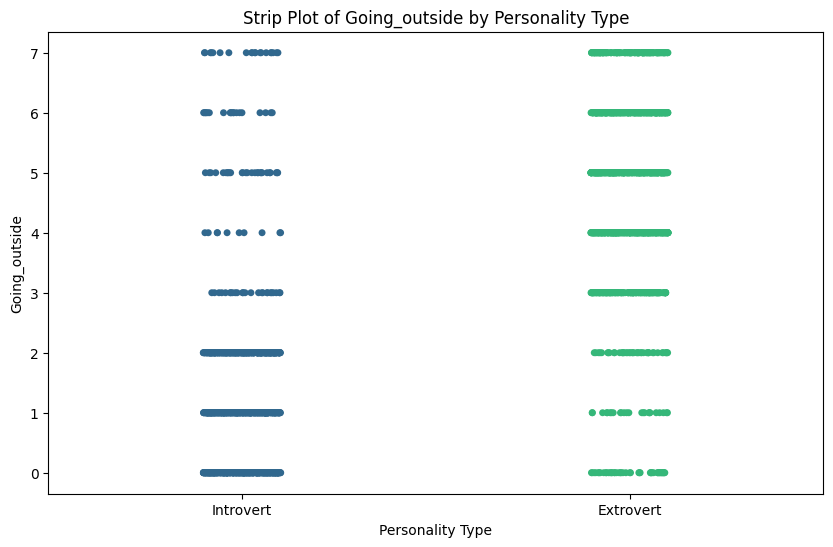

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


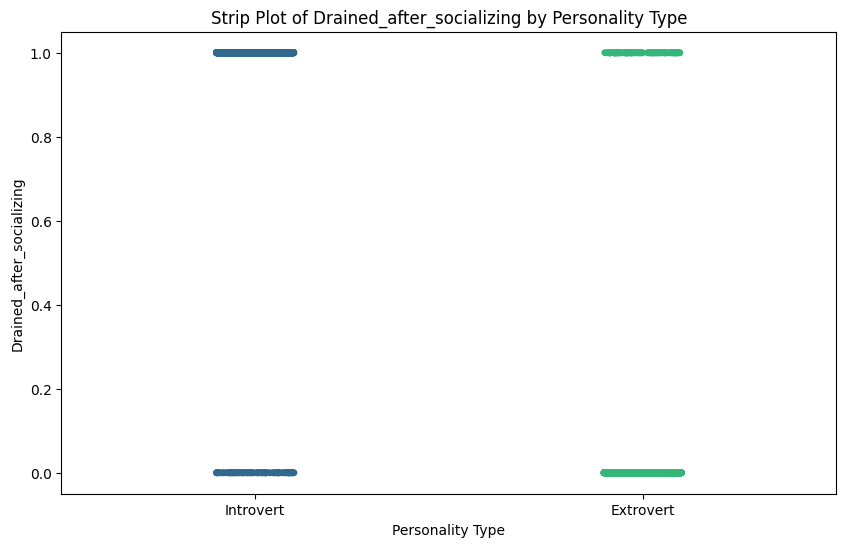

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


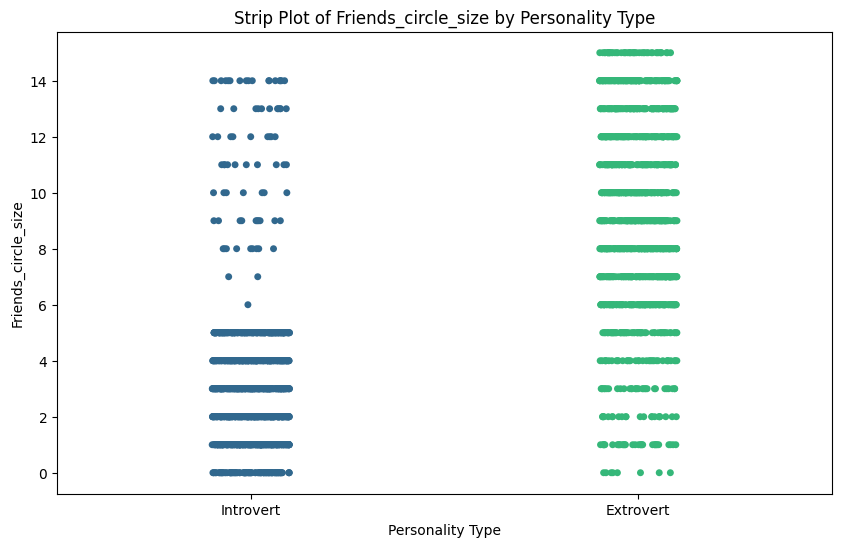

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


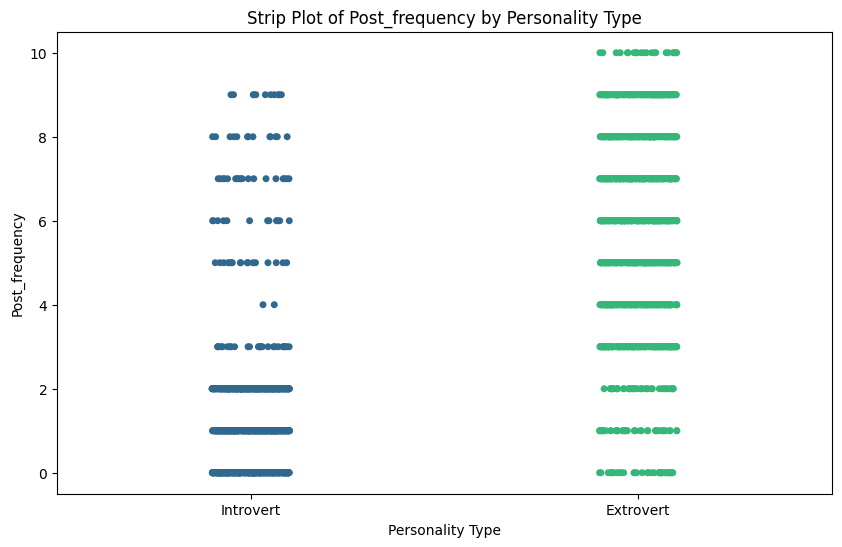

C:\Users\Mes-Sandeep\AppData\Local\Temp\ipykernel_18732\1288534443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)


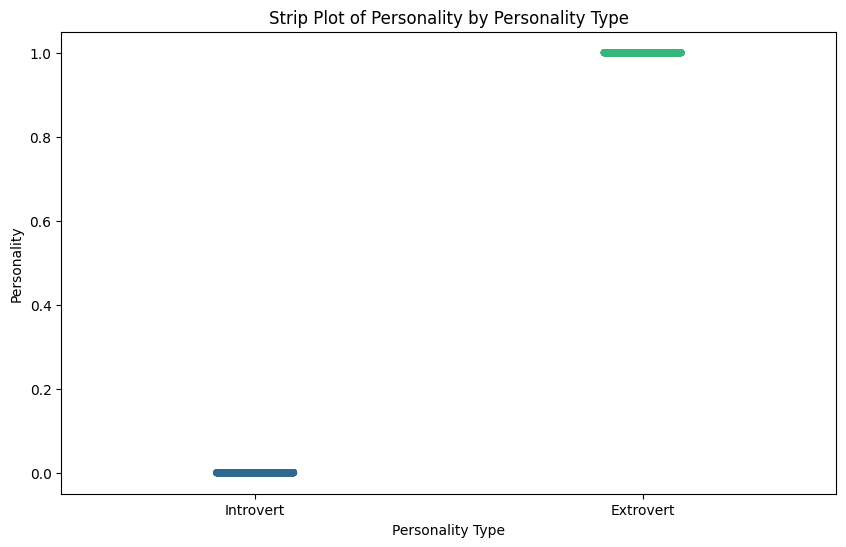

In [59]:
# stripplot for feature vs personality
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='Personality', y=feature, data=df, palette='viridis', jitter=True)
    plt.title(f'Strip Plot of {feature} by Personality Type')
    plt.xlabel('Personality Type')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['Introvert', 'Extrovert'])
    plt.show()

## Model training

#### With RandomForestClassifier

In [61]:
# Model Training

rfc_model = RandomForestClassifier(random_state=42)

# Splitting the dataset into features and target variable
X = df.drop('Personality', axis=1)
y = df['Personality']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Classifier Accuracy: 0.91


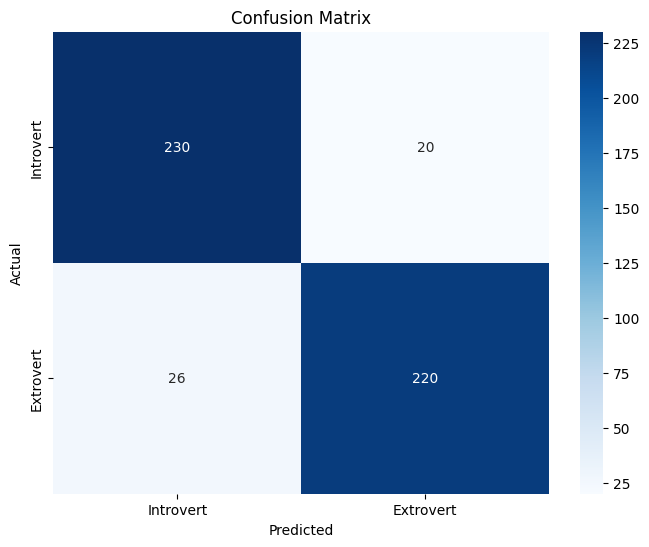

In [68]:
rfc_model.fit(X_train, y_train)
# Making predictions on the test set
y_pred_rfc = rfc_model.predict(X_test)
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Model Evaluation
y_pred = rfc_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rfc))
print('')
print(classification_report(y_test, y_pred_rfc))

[[230  20]
 [ 26 220]]

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       250
           1       0.92      0.89      0.91       246

    accuracy                           0.91       496
   macro avg       0.91      0.91      0.91       496
weighted avg       0.91      0.91      0.91       496



In [72]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(rfc_model, X, y, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {np.mean(cross_val_scores):.2f}")


Cross-validation scores: [0.93145161 0.91733871 0.9030303  0.88484848 0.88282828]
Mean cross-validation score: 0.90


#### With Xgboost Model

XGBoost Classifier Accuracy: 0.92


d:\data_cleaning_using_python\personality_bot\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:32:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


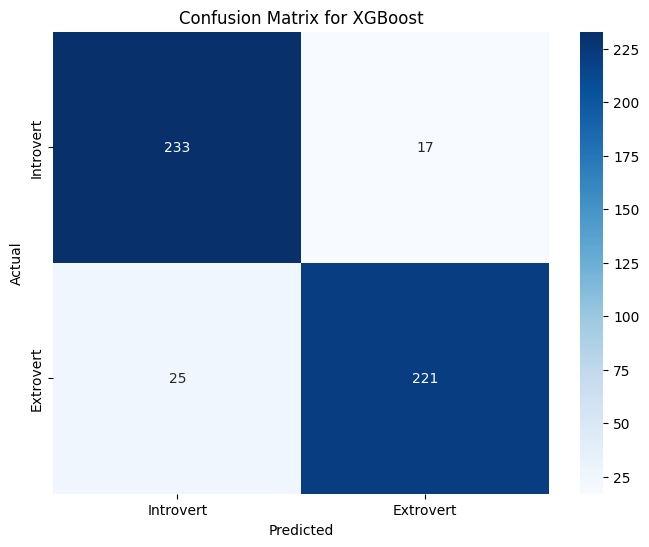

In [70]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Fitting the model
xgb_model.fit(X_train, y_train)
# Making predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")
# Displaying the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
# model evaluation
print(confusion_matrix(y_test, y_pred_xgb))
print('')
print(classification_report(y_test, y_pred_xgb))


[[233  17]
 [ 25 221]]

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       250
           1       0.93      0.90      0.91       246

    accuracy                           0.92       496
   macro avg       0.92      0.92      0.92       496
weighted avg       0.92      0.92      0.92       496



In [75]:
# cross validation for xgboost
from sklearn.model_selection import cross_val_score
cross_val_scores_xgb = cross_val_score(xgb_model, X, y, cv=5)
print(f"Cross-validation scores for XGBoost: {cross_val_scores_xgb}")
print(f"Mean cross-validation score for XGBoost: {np.mean(cross_val_scores_xgb):.2f}")


d:\data_cleaning_using_python\personality_bot\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\data_cleaning_using_python\personality_bot\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\data_cleaning_using_python\personality_bot\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\data_cleaning_using_python\personality_bot\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:46] WARNING: C:\actions-runner\_w

Cross-validation scores for XGBoost: [0.90927419 0.90725806 0.88686869 0.89090909 0.89090909]
Mean cross-validation score for XGBoost: 0.90


In [79]:
# Sample test data for prediction
sample_data = [9.0,1,0.0,0.0,1,0.0,0.0]
sample_data2 = [1.0,0,6.0,7.0,0,14.0,9.0]
# Convert sample data to DataFrame
sample_df = pd.DataFrame([sample_data], columns=X.columns)
# Predicting using Random Forest Classifier
predicted_personality_rfc = rfc_model.predict(sample_df)
# Predicting using XGBoost Classifier
predicted_personality_xgb = xgb_model.predict(sample_df)
# Displaying the predicted personality types
print(f"Predicted Personality (Random Forest): {'Introvert' if predicted_personality_rfc[0] == 0 else 'Extrovert'}")
print(f"Predicted Personality (XGBoost): {'Introvert' if predicted_personality_xgb[0] == 0 else 'Extrovert'}")


Predicted Personality (Random Forest): Introvert
Predicted Personality (XGBoost): Introvert


In [80]:
sample_df2 = pd.DataFrame([sample_data2], columns=X.columns)
# Predicting using Random Forest Classifier
predicted_personality_rfc2 = rfc_model.predict(sample_df2)
# Predicting using XGBoost Classifier
predicted_personality_xgb2 = xgb_model.predict(sample_df2)
# Displaying the predicted personality types for second sample
print(f"Predicted Personality for second sample (Random Forest): {'Introvert' if predicted_personality_rfc2[0] == 0 else 'Extrovert'}")
print(f"Predicted Personality for second sample (XGBoost): {'Introvert' if predicted_personality_xgb2[0] == 0 else 'Extrovert'}")


Predicted Personality for second sample (Random Forest): Extrovert
Predicted Personality for second sample (XGBoost): Extrovert


## Saving the Model


In [76]:
# save the 2 tained models
joblib.dump(rfc_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']